In [64]:
#!pip install pydotplus

In [1]:
#!pip install graphviz

In [65]:
#!pip install dtreeviz             
#!pip install dtreeviz[xgboost]   
#!pip install dtreeviz[pyspark]  
#!pip install dtreeviz[lightgbm]  

In [73]:

import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

In [3]:
df = pd.read_csv('stevens.csv')

In [4]:
df

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
1,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
4,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1
...,...,...,...,...,...,...,...,...,...
561,99-5153,1999,6th,CriminalProcedure,OTHER,US,conser,0,0
562,99-804,2000,5th,CriminalProcedure,OTHER,US,liberal,0,1
563,99-8508,2000,9th,CriminalProcedure,OTHER,US,conser,1,0
564,97-29,1997,DC,CivilRights,STATE,US,conser,0,0


In [5]:
df.columns

Index(['Docket', 'Term', 'Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt', 'Unconst', 'Reverse'],
      dtype='object')

In [6]:
"""
pd.get_dummies(df[['Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt']])
       
"""

"\npd.get_dummies(df[['Circuit', 'Issue', 'Petitioner', 'Respondent',\n       'LowerCourt']])\n       \n"

In [7]:
"""
pd.get_dummies(df, columns=['Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt']).head()
"""

"\npd.get_dummies(df, columns=['Circuit', 'Issue', 'Petitioner', 'Respondent',\n       'LowerCourt']).head()\n"

In [8]:
df['Circuit'].value_counts()

9th     122
5th      53
11th     49
7th      47
4th      46
8th      44
6th      38
2nd      35
10th     33
3rd      32
DC       30
FED      22
1st      15
Name: Circuit, dtype: int64

### enumerate and collect the outcome in a dictionary to use it in converting categorical data into numbers

In [9]:
l1=['aa','bb','cc','dd']
enum=enumerate(l1)
enum

In [10]:
d=dict((j,i) for i,j in enum)
d

{'aa': 0, 'bb': 1, 'cc': 2, 'dd': 3}

### function to convert categoical data into numbers 

In [11]:
def convert_cat(df,col):
    """
    input: dataframe and col list of categorical columns
    output: dataframw with numerical values
    """
    for c in col:
        item_list = df[c].unique().tolist()
        enum=enumerate(item_list)
        d = dict((j,i) for i,j in enum)
        print(c)
        print(d)
        
        df[c].replace(d, inplace=True)
    return df

In [12]:
convert_cat(df,['Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt'])

Circuit
{'2nd': 0, '9th': 1, '5th': 2, '1st': 3, '7th': 4, 'FED': 5, 'DC': 6, '11th': 7, '6th': 8, '3rd': 9, '10th': 10, '8th': 11, '4th': 12}
Issue
{'EconomicActivity': 0, 'JudicialPower': 1, 'CriminalProcedure': 2, 'DueProcess': 3, 'FederalismAndInterstateRelations': 4, 'CivilRights': 5, 'FirstAmendment': 6, 'FederalTaxation': 7, 'Unions': 8, 'Privacy': 9, 'Attorneys': 10}
Petitioner
{'BUSINESS': 0, 'CITY': 1, 'EMPLOYEE': 2, 'AMERICAN.INDIAN': 3, 'INJURED.PERSON': 4, 'GOVERNMENT.OFFICIAL': 5, 'OTHER': 6, 'STATE': 7, 'US': 8, 'CRIMINAL.DEFENDENT': 9, 'EMPLOYER': 10, 'POLITICIAN': 11}
Respondent
{'BUSINESS': 0, 'CITY': 1, 'CRIMINAL.DEFENDENT': 2, 'EMPLOYEE': 3, 'EMPLOYER': 4, 'AMERICAN.INDIAN': 5, 'INJURED.PERSON': 6, 'GOVERNMENT.OFFICIAL': 7, 'OTHER': 8, 'POLITICIAN': 9, 'STATE': 10, 'US': 11}
LowerCourt
{'liberal': 0, 'conser': 1}


,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
0,93-1408,1994,0,0,0,0,0,0,1
1,93-1577,1994,1,0,0,0,0,0,1
2,93-1612,1994,2,0,0,0,0,0,1
3,94-623,1994,3,0,0,0,1,0,1
4,94-1175,1995,4,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
561,99-5153,1999,8,2,6,11,1,0,0
562,99-804,2000,2,2,6,11,0,0,1
563,99-8508,2000,1,2,6,11,1,1,0
564,97-29,1997,6,5,7,11,1,0,0


In [13]:
# check the Circuit column 
df['Circuit'].value_counts()

1     122
2      53
7      49
4      47
12     46
11     44
8      38
0      35
10     33
9      32
6      30
5      22
3      15
Name: Circuit, dtype: int64

In [14]:
X = df[['Circuit', 'Issue', 'Petitioner', 'Respondent',
       'LowerCourt', 'Unconst']]
Y = df[['Reverse']]

In [15]:
df.isnull().sum()

Docket        0
Term          0
Circuit       0
Issue         0
Petitioner    0
Respondent    0
LowerCourt    0
Unconst       0
Reverse       0
dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
X_train

,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst
172,0,0,6,3,1,0
543,2,1,2,11,1,0
231,2,7,6,7,1,0
127,2,5,7,2,0,0
1,1,0,0,0,0,0
...,...,...,...,...,...,...
277,1,1,1,8,0,0
9,7,2,0,0,1,0
359,4,1,6,8,1,1
192,1,0,6,4,1,0


In [18]:
features = X_train.columns

We used 20% of data for testing and 80% for training 

## Model strucutre

In [49]:
clf = tree.DecisionTreeClassifier('gini', min_samples_leaf=30, random_state=0)

**IMPORTANT NOTE**

Decision Tree (DT) can handle both continuous and numeric variables. DT uses either Gini Index or Entropy to measure homogeneity among data points and they make splits which can produce the maximum no. of homogeneous sub-nodes. But if you are using Python Scikit Learn, you might get a ValueError for categorical variables stating “could not convert string to float” while fitting data into a DT model*. Hence it is recommended to use One Hot Encoding for converting categorical features into binary vectors first and then fit it into a DT model. If any categorical variable has very high cardinality (having a large number of values, not ordinal) then you can use Feature Hashing to convert them into numerical variables first.

*In Scikit-Learn, you can use DictVectorizer class to one-hot encode categorical features.

In [50]:
clf = clf.fit(X_train, y_train)

C:\Users\M.Amer\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


### Plotting of the tree

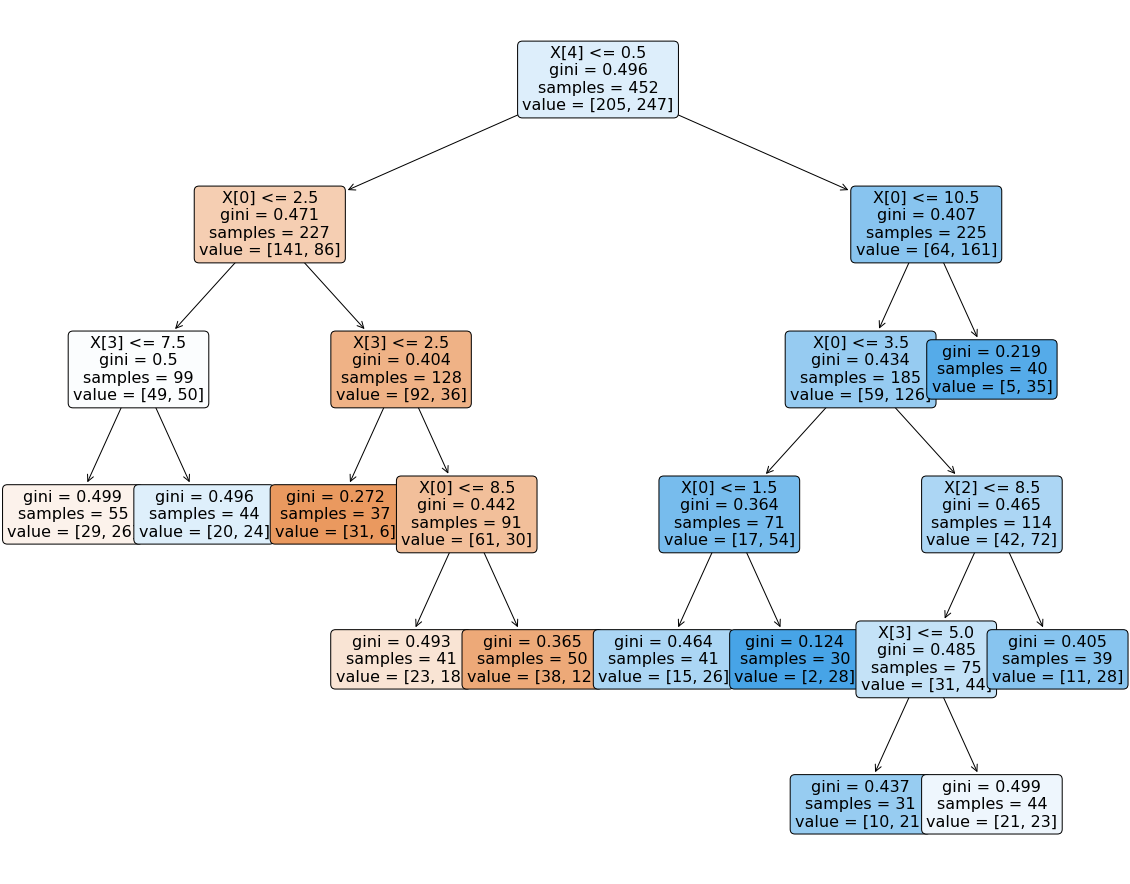

In [63]:
plt.figure(figsize = (20,16))
tree.plot_tree(clf, fontsize = 16,rounded = True , filled = True);

## Make prediction

In [52]:
predTree = clf.predict(X_test)

## Evaluation  

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

### Classification report

In [57]:
report = classification_report(predTree, y_test)

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.48      0.64      0.55        39
           1       0.77      0.64      0.70        75

    accuracy                           0.64       114
   macro avg       0.63      0.64      0.63       114
weighted avg       0.67      0.64      0.65       114



#### reading the classification report  

**F1_score**: 2*(precision*recall)/(precision+recall)

F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

**precision**: (TP)/(TP+FP)

**Recall**: TP/(TP+FN)

### Confusion matrix

In [84]:
# plot a confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix


    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['1 ', '0']); ax.yaxis.set_ticklabels(['1', '0'])

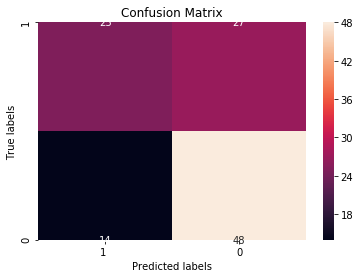

In [85]:
plot_confusion_matrix(y_test,predTree)

### Acccuracy score

In [62]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6403508771929824


### Different ways to plot decision tree 
source

https://github.com/parrt/dtreeviz

### Medium example
https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85